In [1]:
from database import get_thread_sample, get_comments_sample, bulk_update_comments

In [4]:
import pandas as pd

In [17]:
df_comments = pd.read_csv("reddit_comments_numeric.csv")

In [5]:
def from_cursor_to_df(cursor):
    return pd.DataFrame.from_dict(list(cursor))

In [18]:
df_comments['date_created'] = pd.to_datetime(df_comments['created_utc'], unit='s')
df_comments.drop(columns=['created_utc'], inplace=True)

In [30]:
corrMatrix = df_comments.corr(method='pearson')

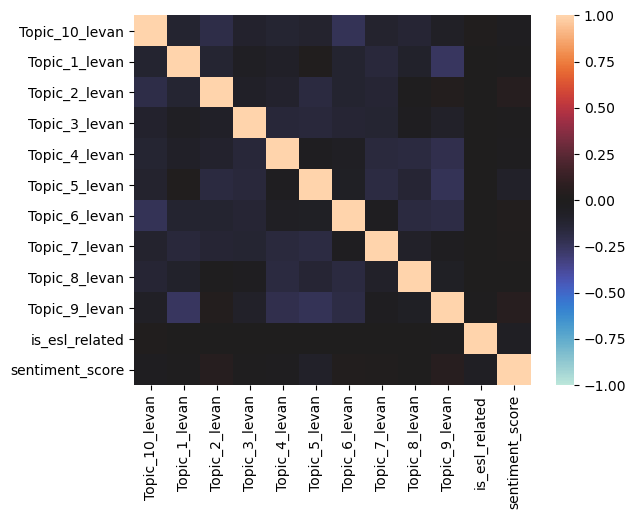

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.color_palette("hls", 8)
sns.heatmap(corrMatrix, annot=False, center=0, vmin=-1, vmax=1)
plt.show()

In [47]:
df = pd.read_csv("Sentiment_over_time.csv")
df['esl'] = False

In [48]:
df = pd.concat([df, pd.read_csv("Sentiment_over_time_esl.csv")]).reset_index(drop=True)

In [49]:
df['esl'].fillna(True, inplace=True)

In [51]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df = pd.DataFrame({'state': ['CA', 'WA', 'CO', 'AZ'] * 3,
                   'office_id': list(range(1, 7)) * 2,
                   'sales': [np.random.randint(100000, 999999)
                             for _ in range(12)]})
state_office = df.groupby(['state', 'office_id']).agg({'sales': 'sum'})
# Change: groupby state_office and divide by sum
state_pcts = state_office.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [69]:
df

,date,flair_sentiment,Count,esl
0,2021-04-18,POSITIVE,10554,False
1,2021-04-18,NEGATIVE,26611,False
2,2021-04-19,NEGATIVE,58565,False
3,2021-04-19,POSITIVE,28096,False
4,2021-04-20,POSITIVE,30097,False
5,2021-04-20,NEGATIVE,57448,False
6,2021-04-21,POSITIVE,7132,False
7,2021-04-21,NEGATIVE,17145,False
8,2021-04-22,NEGATIVE,8451,False
9,2021-04-22,POSITIVE,3229,False


In [81]:
df.loc[df['esl']==True,'negative_share'] = df.loc[df['esl']==True, 'Count'] / df[df['esl']==True].groupby(['date']).sum()['Count']

<ipython-input-81-767da63059bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['esl']==True]['negative_share'] = df[df['esl']==True]['Count'] / df[df['esl']==True].groupby(['date']).sum()['Count']


In [87]:
df.loc[df['esl']==True, 'Count']

18     8801
19    13978
20    16814
21    24837
22    18410
23    28987
24    24133
25    47973
26        1
27    29715
28    55157
29    44086
30    24414
31    27373
32    14947
33    17168
34    30075
35    20613
36    37073
37    43606
38    26853
39        1
40    11828
41     7081
Name: Count, dtype: int64

In [86]:
df[df['esl']==True].groupby(['date']).sum()['Count']

date
2021-04-16    22779
2021-04-17    41651
2021-04-18    47397
2021-04-19    72107
2021-04-20    84872
2021-04-21    68500
2021-04-22    42320
2021-04-23    47243
2021-04-24    57686
2021-04-25    70460
2021-04-26    18909
Name: Count, dtype: int64

In [85]:
df.loc[df['esl']==True, 'Count'] / df[df['esl']==True].groupby(['date']).sum()['Count']

2021-04-16 00:00:00   NaN
2021-04-17 00:00:00   NaN
2021-04-18 00:00:00   NaN
2021-04-19 00:00:00   NaN
2021-04-20 00:00:00   NaN
2021-04-21 00:00:00   NaN
2021-04-22 00:00:00   NaN
2021-04-23 00:00:00   NaN
2021-04-24 00:00:00   NaN
2021-04-25 00:00:00   NaN
2021-04-26 00:00:00   NaN
18                    NaN
19                    NaN
20                    NaN
21                    NaN
22                    NaN
23                    NaN
24                    NaN
25                    NaN
26                    NaN
27                    NaN
28                    NaN
29                    NaN
30                    NaN
31                    NaN
32                    NaN
33                    NaN
34                    NaN
35                    NaN
36                    NaN
37                    NaN
38                    NaN
39                    NaN
40                    NaN
41                    NaN
Name: Count, dtype: float64

In [84]:
df.loc[ df['esl']==True,'negative_share']

KeyError: 'negative_share'

In [82]:
df

,date,flair_sentiment,Count,esl
0,2021-04-18,POSITIVE,10554,False
1,2021-04-18,NEGATIVE,26611,False
2,2021-04-19,NEGATIVE,58565,False
3,2021-04-19,POSITIVE,28096,False
4,2021-04-20,POSITIVE,30097,False
5,2021-04-20,NEGATIVE,57448,False
6,2021-04-21,POSITIVE,7132,False
7,2021-04-21,NEGATIVE,17145,False
8,2021-04-22,NEGATIVE,8451,False
9,2021-04-22,POSITIVE,3229,False


In [80]:
df['esl']==True and df['flair_sentiment'] == 'NEGATIVE'

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [76]:
df[df['esl']==True].groupby(['date']).sum()['Count']

date
2021-04-16    22779
2021-04-17    41651
2021-04-18    47397
2021-04-19    72107
2021-04-20    84872
2021-04-21    68500
2021-04-22    42320
2021-04-23    47243
2021-04-24    57686
2021-04-25    70460
2021-04-26    18909
Name: Count, dtype: int64

In [68]:
df_new

,Count,esl
date,,
2021-04-16,22779,2
2021-04-17,41651,2
2021-04-18,84562,2
2021-04-19,158768,3
2021-04-20,172417,2
2021-04-21,92777,2
2021-04-22,54000,2
2021-04-23,54241,2
2021-04-24,60567,2
